In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt

In [4]:
path = os.getcwd()
fifa_concat = pd.read_csv(path+"/fifa_cleaned.csv")
fifa_concat.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,high_Work_Rate,low_Work_Rate,medium_Work_Rate,right_foot,left_foot
0,158023,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1,0.93,...,6,11,15,14,8,0,1,1,0,1
1,20801,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1,0.92,...,7,11,15,14,11,1,1,0,1,0
2,200389,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1,0.91,...,87,92,78,90,90,0,0,2,1,0
3,188545,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1,0.91,...,15,6,12,8,10,1,0,1,1,0
4,190871,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1,0.91,...,9,9,15,15,11,1,0,1,1,0


In [5]:
fifa_concat.isnull().sum()

sofifa_id           0
short_name          0
age                 0
height_cm           0
weight_kg           0
                   ..
high_Work_Rate      0
low_Work_Rate       0
medium_Work_Rate    0
right_foot          0
left_foot           0
Length: 70, dtype: int64

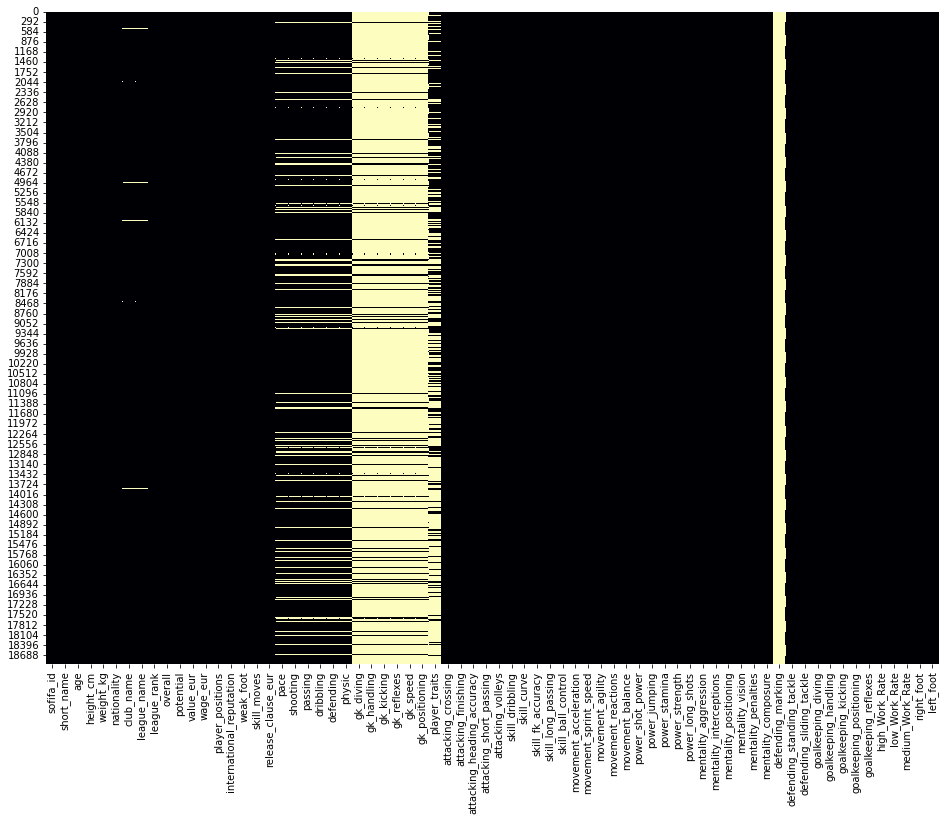

In [6]:
# created a heatmap to check null values in the dataset
plt.figure(figsize = (16,12))
sns.heatmap(fifa_concat.isnull(), cbar=False , cmap = 'magma')

In [7]:
# # imputing release_clause_eur with mean value
# mean = fifa_concat['release_clause_eur'].mean()
# fifa_concat['release_clause_eur'].fillna(mean, inplace = True)


In [8]:
# # imputing dribbling with mean value
# mean = fifa_concat['dribbling'].mean()
# fifa_concat['dribbling'].fillna(mean, inplace = True)


In [9]:
# # imputing passing with mean value
# mean = fifa_concat['passing'].mean()
# fifa_concat['passing'].fillna(mean, inplace = True)


In [10]:
# # now for shooting
# mean = fifa_concat['shooting'].mean()
# fifa_concat['shooting'].fillna(mean, inplace = True)

In [11]:
# # same is done for pace
# mean = fifa_concat['pace'].mean()
# fifa_concat['pace'].fillna(mean, inplace = True)

In [12]:
# # same is done for pace
# mean = fifa_concat['defending'].mean()
# fifa_concat['defending'].fillna(mean, inplace = True)

In [13]:
# # same is done for pace
# mean = fifa_concat['physic'].mean()
# fifa_concat['physic'].fillna(mean, inplace = True)

In [14]:
#dropping columns whcih are not outfield player related
fifa_concat=fifa_concat.drop(['gk_diving','gk_handling','gk_kicking',
                              'gk_reflexes','gk_speed','gk_positioning',
                              'defending_marking','goalkeeping_diving',
                               'goalkeeping_handling', 'goalkeeping_kicking',
                               'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1)

In [15]:
fifa_cleaned = fifa_concat.dropna(axis=1)
fifa_cleaned

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,league_rank,overall,potential,value_eur,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,high_Work_Rate,low_Work_Rate,medium_Work_Rate,right_foot,left_foot
0,158023,L. Messi,33,170,72,Argentina,1,0.93,0.93,67500000,...,95,75,96,35,24,0,1,1,0,1
1,20801,Cristiano Ronaldo,35,187,83,Portugal,1,0.92,0.92,46000000,...,82,84,95,32,24,1,1,0,1,0
2,200389,J. Oblak,27,188,87,Slovenia,1,0.91,0.93,75000000,...,65,11,68,12,18,0,0,2,1,0
3,188545,R. Lewandowski,31,184,80,Poland,1,0.91,0.91,80000000,...,79,88,88,42,19,1,0,1,1,0
4,190871,Neymar Jr,28,175,68,Brazil,1,0.91,0.91,90000000,...,90,92,93,30,29,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,Colombia,1,0.47,0.52,40000,...,49,39,36,39,54,0,0,2,1,0
18940,257710,Zhang Mengxuan,21,177,70,China PR,1,0.47,0.52,35000,...,25,35,40,56,47,0,2,0,1,0
18941,250989,Wang Zhenghao,20,185,74,China PR,1,0.47,0.51,35000,...,25,35,40,55,45,0,1,1,1,0
18942,257697,Chen Zitong,23,186,80,China PR,1,0.47,0.51,40000,...,45,42,43,49,45,0,2,0,1,0


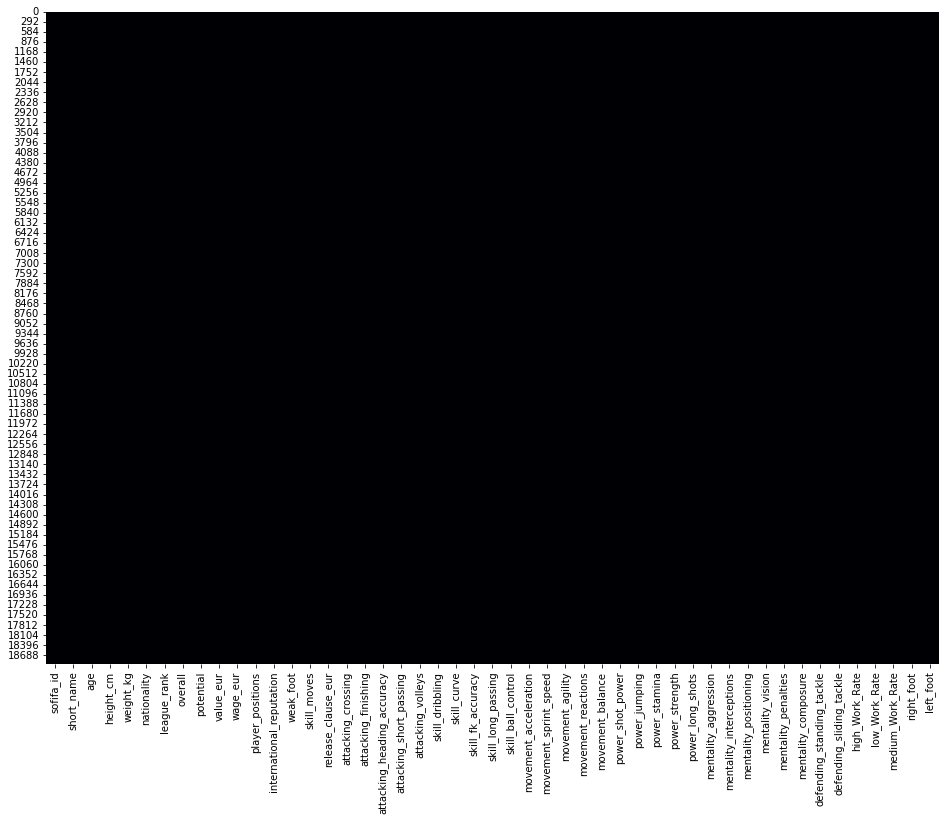

In [16]:
# created a heatmap to check null values in the dataset
plt.figure(figsize = (16,12))
sns.heatmap(fifa_cleaned.isnull(), cbar=False , cmap = 'magma')

In [17]:
fifa_cleaned.columns

Index(['sofifa_id', 'short_name', 'age', 'height_cm', 'weight_kg',
       'nationality', 'league_rank', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'high_Work_Rate', 'low_Work_Rate',
     

In [18]:
# convert categorical data into numerical data if need be
fifa_cleaned = pd.get_dummies(fifa_cleaned)

In [19]:
# split data into training (80%) and test set (20%)
train, test = train_test_split(fifa_cleaned, test_size = 0.2)
# print(test[0:1])

In [20]:
# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

In [21]:
x_test = test.drop('overall', axis = 1)
y_test = test['overall']

In [22]:
# we skip the scaling for now since the dataset looks fine and well scaled
# moving on to the different K-values evaluation

# array to store r mean square error values for different values of k
rmse_val = []

In [23]:
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train) # model fitting
    pred = model.predict(x_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 0.017427601627752604
RMSE value for k=  2 is: 0.015695581544533918
RMSE value for k=  3 is: 0.015336465651352407
RMSE value for k=  4 is: 0.015116225187588306
RMSE value for k=  5 is: 0.014926157647100495
RMSE value for k=  6 is: 0.014897256209568647
RMSE value for k=  7 is: 0.014849614100593872
RMSE value for k=  8 is: 0.014856090814324343
RMSE value for k=  9 is: 0.014921680633212702
RMSE value for k=  10 is: 0.014978598262582854
RMSE value for k=  11 is: 0.015088792653257238
RMSE value for k=  12 is: 0.01517361139420809
RMSE value for k=  13 is: 0.015232345298068724
RMSE value for k=  14 is: 0.015296909071753094
RMSE value for k=  15 is: 0.015330441394810702
RMSE value for k=  16 is: 0.015440601672043792
RMSE value for k=  17 is: 0.015477179240935751
RMSE value for k=  18 is: 0.01553153006034914
RMSE value for k=  19 is: 0.015634497085990195
RMSE value for k=  20 is: 0.015731738482179302


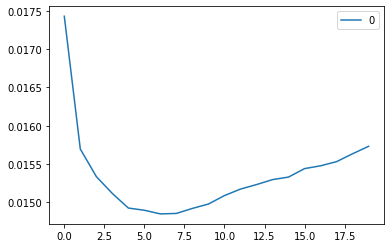

In [24]:
#plotting the rmse values against k values
# the resulting double elbow curve reveals 3 and 9
# as the most consisitent K-values
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [25]:
# sample prediction and evaluation
k = 9
model = neighbors.KNeighborsRegressor(n_neighbors = k)
model.fit(x_train, y_train) # model fitting
pred = model.predict(x_test) # prediction
evaluation = model.score(x_test, y_test) # evaluation or score
print("predictions: \n",pred, "\n")
print(y_test, "\n")
print("score: ", evaluation, "\n")

predictions: 
 [0.65555556 0.66       0.61444444 ... 0.66222222 0.56555556 0.63444444] 

9074     0.66
9570     0.65
14261    0.61
113      0.84
10781    0.64
         ... 
5551     0.69
12372    0.63
5670     0.69
17567    0.55
11760    0.64
Name: overall, Length: 3789, dtype: float64 

score:  0.954996248044986 



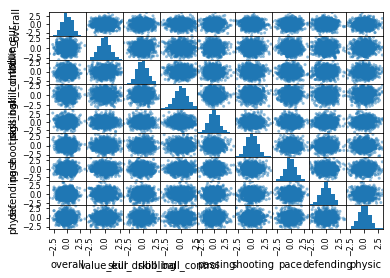

In [26]:
# sample visualization
from pandas.plotting import scatter_matrix
newdf = pd.DataFrame(np.random.randn(1000, 9), 
                     columns=['overall', 'value_eur', 'skill_dribbling', 
                              'skill_ball_control', 'passing', 'shooting', 
                              'pace', 'defending', 'physic'
                             ]
                    )
pd.plotting.scatter_matrix(newdf)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d39087e50>,
      dtype=object)

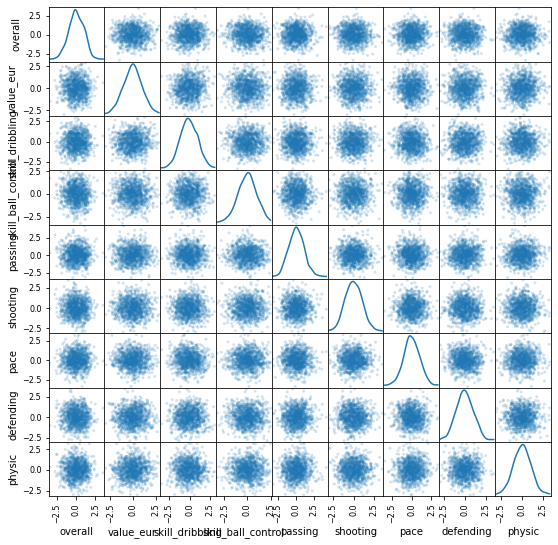

In [27]:
scatter_matrix(newdf, alpha=0.2, figsize=(9,9), diagonal='kde')


In [28]:
# #######################################################################
# # time for real deal prediction

# path = os.getcwd()
# test.to_csv(path+'/test.csv')
# y_test.to_csv(path+'/y_test.csv')

In [29]:
predictions = pd.DataFrame(pred, columns = ['overall_pred'])
# predictions.to_csv(path+'/pred.csv', index = False)


In [30]:
# with basic printing done, we do this properly and output it to a file

# pd.read_csv(path+'/SampleSubmission.csv')
submission = pd.DataFrame()
submission['sofifa_id'] = test['sofifa_id']
submission['age'] = test['age']
submission['actual_overall'] = test['overall']
submission.head()
                          
# new_test = test.drop(['sofifa_id', 'age'], axis = 1, inplace = True)

,sofifa_id,age,actual_overall
9074,220357,27,0.66
9570,242964,19,0.65
14261,256675,21,0.61
113,189117,29,0.84
10781,246431,21,0.64


In [31]:
submission['overall'] = ''
submission.head()

,sofifa_id,age,actual_overall,overall
9074,220357,27,0.66,
9570,242964,19,0.65,
14261,256675,21,0.61,
113,189117,29,0.84,
10781,246431,21,0.64,


In [32]:
# preprocess the test csv file
# new_test = test.drop(['sofifa_id', 'age'], axis = 1, inplace = True)
# new_test['overall'].fillna(mean, inplace = True)
# new_test = pd.get_dummies(new_test)

In [33]:
test

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,player_positions,...,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Venezuela,nationality_Wales,nationality_Zambia,nationality_Zimbabwe
9074,220357,27,186,85,1,0.66,0.67,650000,9000,2,...,0,0,0,0,0,0,0,0,0,0
9570,242964,19,185,70,1,0.65,0.83,1200000,11000,1,...,0,0,0,0,0,0,0,0,0,0
14261,256675,21,177,68,1,0.61,0.69,375000,6000,1,...,0,0,0,0,0,0,0,0,0,0
113,189117,29,187,85,1,0.84,0.85,25000000,67000,4,...,0,0,0,0,0,0,0,0,0,0
10781,246431,21,180,75,1,0.64,0.79,1000000,6000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,225441,23,175,68,2,0.69,0.76,1500000,17000,2,...,0,0,0,0,0,0,0,0,0,0
12372,255469,22,164,60,1,0.63,0.69,450000,750,3,...,0,0,0,0,0,0,0,0,0,0
5670,232713,25,193,90,1,0.69,0.74,1000000,5000,4,...,0,0,0,0,0,0,0,0,0,0
17567,245503,20,184,69,4,0.55,0.70,180000,2000,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#dropping columns whcih are not outfield player related
test=test.drop(['overall'], axis=1)

In [35]:
list(test.columns)


['sofifa_id',
 'age',
 'height_cm',
 'weight_kg',
 'league_rank',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'high_Work_Rate',
 'low_Work_Rate',
 'medium_Work_Rate',
 'right_foot',
 'left_foot',
 'short_name_A. Abdallah',
 'short_name_A. Abdella

In [36]:
submission

,sofifa_id,age,actual_overall,overall
9074,220357,27,0.66,
9570,242964,19,0.65,
14261,256675,21,0.61,
113,189117,29,0.84,
10781,246431,21,0.64,
...,...,...,...,...
5551,225441,23,0.69,
12372,255469,22,0.63,
5670,232713,25,0.69,
17567,245503,20,0.55,


In [37]:
# predicting on the test set and creating submission file
predict = model.predict(test)

submission['overall'] = predict
#submission.to_csv('Datasets/submit_file.csv', index = False)
submission.head()

,sofifa_id,age,actual_overall,overall
9074,220357,27,0.66,0.655556
9570,242964,19,0.65,0.660000
14261,256675,21,0.61,0.614444
113,189117,29,0.84,0.826667
10781,246431,21,0.64,0.658889


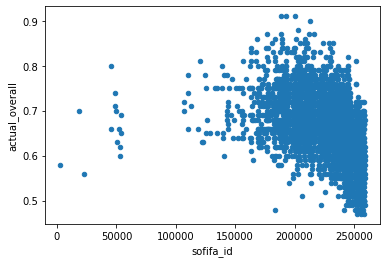

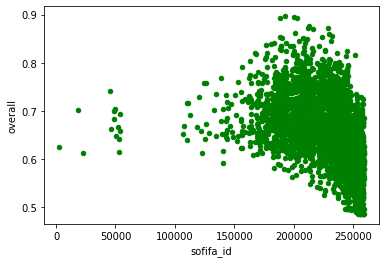

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
   
#data = {'country': ['A', 'B', 'C', 'D', 'E'],
#        'gdp_per_capita': [45000, 42000, 52000, 49000, 47000]
#       }
  
df = pd.DataFrame(submission)
df.plot(x='sofifa_id', y='actual_overall', kind='scatter')
df.plot(x='sofifa_id', y='overall', kind='scatter', color = 'green')
plt.show()



ValueError: ignored

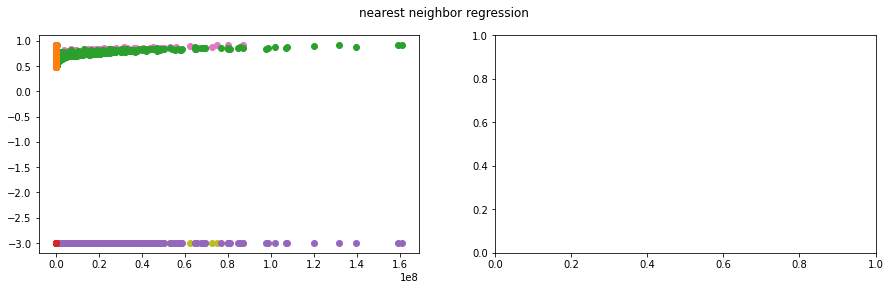

In [39]:
# evaluation 1: multiple KNN Regression predictions with various k values

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
plt.suptitle("nearest neighbor regression")

# plot the comparison graph for the specified KNeighbors
line = np.linspace(-3, 3, 200).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 5, 7, 9, 11, 13, 15, 17], axes):
    reg = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors).fit(x_test, y_test)
    ax.plot(x_test,y_test, 'o')
    ax.plot(x_test, -3 * np.ones(len(x_test)), 'o')
    ax.plot(line, reg.predict(x_test))
    ax.set_title("%d neighbor(s)" % n_neighbors)
